# Deskripsi Permasalahan

Membuat sebuah model yang dapat menentukan prediksi harga kripto khususnya Ethereum 1 tahun kedepan yakni ditahun 2022. Sehingga, kita dapat mengambiil keputusan untuk membeli ataumenjual koin kripto tersebut saat ini demi mendapatkan keuntungan yang maksimal dan meminimalisir kerugian.

# Metadata

Dataset Data Historis Ethereum - Investing.com.csv
* 1. Tanggal    --> Catatan waktu yang dimuat dalam format tanggal/bulan/tahun
* 2. Terakhir   --> Harga terakhir koin ethereum pada tanggal tersebut
* 3. Pembukaan  --> Harga awal koin ethereum pada tanggal tersebut
* 4. Tertinggi  --> Harga tertinggi yang diberikan untuk koin ethereum pada tanggal tersebut
* 5. Terendah   --> Harga terendah yang diberikan untuk koin ethereum pada tanggal tersebut
* 6. Vol.       --> Banyaknya orang yang sedang memiliki koin ethereum ppada tanggal tersebut
* 7. Perubahan% --> Presentasi perubahan dari harga Pembukaan dengan harga Terakhir

# Data Understanding

In [1]:
#Import Library
# import library pandas
import pandas as pd

# import library numpy
import numpy as np

# import library matplotlib
import matplotlib.pyplot as plt

# import library seaborn
import seaborn as sns

# me non aktifkan peringatan pada python dengan import warning -> 'ignore'
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Memuat dataset
df =  pd.read_csv('Data Historis Ethereum.csv')
#Memanggil serta menampilkan 10 data teratas dari dataset tersebut
df.head(10)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/12/2021,"4.569,60","4.583,28","4.629,75","4.454,79","617,22K","-0,30%"
1,01/12/2021,"4.583,28","4.628,72","4.778,14","4.525,33","669,18K","-0,99%"
2,30/11/2021,"4.628,90","4.443,22","4.749,12","4.349,21","973,46K","4,18%"
3,29/11/2021,"4.443,22","4.296,98","4.456,82","4.280,18","532,66K","3,40%"
4,28/11/2021,"4.296,98","4.095,16","4.297,63","3.980,24","487,53K","4,94%"
5,27/11/2021,"4.094,80","4.037,06","4.183,02","4.029,06","370,73K","1,49%"
6,26/11/2021,"4.034,53","4.520,30","4.548,10","3.917,43","1,00M","-10,75%"
7,25/11/2021,"4.520,30","4.270,73","4.549,74","4.248,90","578,65K","5,77%"
8,24/11/2021,"4.273,54","4.340,23","4.372,83","4.172,19","595,96K","-1,54%"
9,23/11/2021,"4.340,23","4.086,73","4.384,75","4.064,17","684,35K","6,20%"


In [3]:
#Melihat detail informasi terkain kolom yang ada dalam dataset tersebut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2094 non-null   object
 1   Terakhir    2094 non-null   object
 2   Pembukaan   2094 non-null   object
 3   Tertinggi   2094 non-null   object
 4   Terendah    2094 non-null   object
 5   Vol.        2094 non-null   object
 6   Perubahan%  2094 non-null   object
dtypes: object(7)
memory usage: 114.6+ KB


Bentuk tipe data dari masing-masing atribut yang ada dalam dataset tersebut adalah bertipe object semuanya

In [4]:
#Melihat dimensi dataset
df.shape

(2094, 7)

Dataset tersebut memiliki 2094 baris data dengan 7 kolom

In [5]:
#Melakukan pengecekan missing values terhadap dataset
print('Jumlah dataset yang ada pada masing-masing atribut:')
df.isna().sum()

Jumlah dataset yang ada pada masing-masing atribut:


Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

Tidak terdapat missing values dalam dataset tersebut

In [6]:
#Melihat deskripsi dataset secara statistik
df.describe()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
count,2094,2094,2094,2094,2094,2094,2094
unique,2094,1983,1974,1976,1967,1648,1213
top,02/12/2021,"10,16","10,16","10,16","10,16",-,"0,00%"
freq,1,9,8,7,7,8,14


Karena dataset tersebut memiliki kolom dengan tipe data object semuanya maka tidak dapat ditambilkan perhitungannya secara statistik. Sehingga pada tahap berikutnya yaitu Data Preparation perlu dilakukan perubahaan tipe data menjadi numerik untuk  6 kolom lainnya kecuali kolom Tanggal perlu diubah menjadi tipe Date agar dapat dilakukan pengolahan lebih lanjut

# Data Preparation

In [7]:
#Memanggil kembali dataset
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/12/2021,"4.569,60","4.583,28","4.629,75","4.454,79","617,22K","-0,30%"
1,01/12/2021,"4.583,28","4.628,72","4.778,14","4.525,33","669,18K","-0,99%"
2,30/11/2021,"4.628,90","4.443,22","4.749,12","4.349,21","973,46K","4,18%"
3,29/11/2021,"4.443,22","4.296,98","4.456,82","4.280,18","532,66K","3,40%"
4,28/11/2021,"4.296,98","4.095,16","4.297,63","3.980,24","487,53K","4,94%"
...,...,...,...,...,...,...,...
2089,14/03/2016,"12,50","15,07","15,07","11,40","92,18K","-17,05%"
2090,13/03/2016,"15,07","12,92","15,07","12,92","1,30K","16,64%"
2091,12/03/2016,"12,92","11,95","13,45","11,95","0,83K","8,12%"
2092,11/03/2016,"11,95","11,75","11,95","11,75","0,18K","1,70%"


In [8]:
#Melakukan perubahan terhadap format bilangan dalam dataset dengan menghilangkan tanda titik (.) sebagai ribuan
df['Terakhir'] = df['Terakhir'].str.replace('.', '')
df['Pembukaan'] = df['Pembukaan'].str.replace('.', '')
df['Tertinggi'] = df['Tertinggi'].str.replace('.', '')
df['Terendah'] = df['Terendah'].str.replace('.', '')
df['Vol.'] = df['Vol.'].str.replace(',', '')
df['Vol.'] = df['Vol.'].str.replace('K', '0')
df['Vol.'] = df['Vol.'].str.replace('M', '0000')
df['Perubahan%'] = df['Perubahan%'].str.replace('%', '')

In [9]:
#Menampilkan kembali dataset setelah dilakukan perubahan format bilangan dengan menghilangkan tanda titik
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/12/2021,"4569,60","4583,28","4629,75","4454,79",617220,"-0,30"
1,01/12/2021,"4583,28","4628,72","4778,14","4525,33",669180,"-0,99"
2,30/11/2021,"4628,90","4443,22","4749,12","4349,21",973460,"4,18"
3,29/11/2021,"4443,22","4296,98","4456,82","4280,18",532660,"3,40"
4,28/11/2021,"4296,98","4095,16","4297,63","3980,24",487530,"4,94"
...,...,...,...,...,...,...,...
2089,14/03/2016,"12,50","15,07","15,07","11,40",92180,"-17,05"
2090,13/03/2016,"15,07","12,92","15,07","12,92",1300,"16,64"
2091,12/03/2016,"12,92","11,95","13,45","11,95",0830,"8,12"
2092,11/03/2016,"11,95","11,75","11,95","11,75",0180,"1,70"


In [10]:
#Melakukan perubahan terhadap format bilangan dalam dataset dengan mengganti tanda koma (,) menjadi tanda (.) supaya dapat merubah tipe data menjadi float
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format = "%d/%m/%Y")
df['Terakhir'] = df['Terakhir'].str.replace(',', '.').astype(float)
df['Pembukaan'] = df['Pembukaan'].str.replace(',', '.').astype(float)
df['Tertinggi'] = df['Tertinggi'].str.replace(',', '.').astype(float)
df['Terendah'] = df['Terendah'].str.replace(',', '.').astype(float)
df['Vol.']= pd.to_numeric(df['Vol.'], errors='coerce')
df['Perubahan%'] = df['Perubahan%'].str.replace(',', '.').astype(float)

In [11]:
#Menampilkan kembali dataset setelah dilakukan semua perubahan format bilangan beserta tipe data menjadi float
df.head(5)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2021-12-02,4569.60,4583.28,4629.75,4454.79,617220.0,-0.30
1,2021-12-01,4583.28,4628.72,4778.14,4525.33,669180.0,-0.99
2,2021-11-30,4628.90,4443.22,4749.12,4349.21,973460.0,4.18
3,2021-11-29,4443.22,4296.98,4456.82,4280.18,532660.0,3.40
4,2021-11-28,4296.98,4095.16,4297.63,3980.24,487530.0,4.94


In [12]:
#Membuat data pada atribut Perubahan% dalam bentuk format desimal tanpa tanda % dengan mengalikannya dengan 0.01
df['Perubahan%'] = df['Perubahan%'] * 0.01

In [13]:
df.head(5)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2021-12-02,4569.60,4583.28,4629.75,4454.79,617220.0,-0.0030
1,2021-12-01,4583.28,4628.72,4778.14,4525.33,669180.0,-0.0099
2,2021-11-30,4628.90,4443.22,4749.12,4349.21,973460.0,0.0418
3,2021-11-29,4443.22,4296.98,4456.82,4280.18,532660.0,0.0340
4,2021-11-28,4296.98,4095.16,4297.63,3980.24,487530.0,0.0494


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2094 non-null   datetime64[ns]
 1   Terakhir    2094 non-null   float64       
 2   Pembukaan   2094 non-null   float64       
 3   Tertinggi   2094 non-null   float64       
 4   Terendah    2094 non-null   float64       
 5   Vol.        2086 non-null   float64       
 6   Perubahan%  2094 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 114.6 KB


In [15]:
#Melakukan pengecekan missing values terhadap dataset setelah dilakukan perubaha format dan tipe data terhadap dataset
print('Jumlah dataset yang ada pada masing-masing atribut:')
df.isna().sum()

Jumlah dataset yang ada pada masing-masing atribut:


Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          8
Perubahan%    0
dtype: int64

In [16]:
#Melihat baris data yang missing value pada kolom Vol.
mv_Vol = df.loc[np.where(df['Vol.'].isna())]
mv_Vol

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
1467,2017-11-26,464.00,464.00,464.00,464.00,NaN,0.0
1941,2016-08-09,10.16,10.16,10.16,10.16,NaN,0.0
1942,2016-08-08,10.16,10.16,10.16,10.16,NaN,0.0
1943,2016-08-07,10.16,10.16,10.16,10.16,NaN,0.0
1944,2016-08-06,10.16,10.16,10.16,10.16,NaN,0.0
1945,2016-08-05,10.16,10.16,10.16,10.16,NaN,0.0
1946,2016-08-04,10.16,10.16,10.16,10.16,NaN,0.0
1947,2016-08-03,10.16,10.16,10.16,10.16,NaN,0.0


Dari Data Frame diatas yang menunjukan isi dari baris data yang mengandung missing value terhadap atribut Vol. menunjukkan bahwa ada kejanggalan terhadap data. Yang mana tidak ada pergerakan data dari tanggal 3 Agustus 2016 s/d 9 Agustus 2016 dan pada tanggal 26 November 2017. Karena pola data dari 8 baris tersebut yang janggal, kami sepakat untuk tidak memuatnya kedalam dataset. Selanjutnya perlu dilakukan penghapusan 8 baris data missing value tersebut

In [17]:
#Menghapus data missing value dari dataset
df = df.dropna()
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2021-12-02,4569.60,4583.28,4629.75,4454.79,617220.0,-0.0030
1,2021-12-01,4583.28,4628.72,4778.14,4525.33,669180.0,-0.0099
2,2021-11-30,4628.90,4443.22,4749.12,4349.21,973460.0,0.0418
3,2021-11-29,4443.22,4296.98,4456.82,4280.18,532660.0,0.0340
4,2021-11-28,4296.98,4095.16,4297.63,3980.24,487530.0,0.0494
...,...,...,...,...,...,...,...
2089,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-0.1705
2090,2016-03-13,15.07,12.92,15.07,12.92,1300.0,0.1664
2091,2016-03-12,12.92,11.95,13.45,11.95,830.0,0.0812
2092,2016-03-11,11.95,11.75,11.95,11.75,180.0,0.0170


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2093
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2086 non-null   datetime64[ns]
 1   Terakhir    2086 non-null   float64       
 2   Pembukaan   2086 non-null   float64       
 3   Tertinggi   2086 non-null   float64       
 4   Terendah    2086 non-null   float64       
 5   Vol.        2086 non-null   float64       
 6   Perubahan%  2086 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 130.4 KB


In [19]:
df.tail()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
2089,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-0.1705
2090,2016-03-13,15.07,12.92,15.07,12.92,1300.0,0.1664
2091,2016-03-12,12.92,11.95,13.45,11.95,830.0,0.0812
2092,2016-03-11,11.95,11.75,11.95,11.75,180.0,0.0170
2093,2016-03-10,11.75,11.20,11.85,11.07,0.0,0.0491


In [20]:
#Melakukan pengecekan missing values terhadap dataset setelah dilakukan penanganan
print('Jumlah dataset yang ada pada masing-masing atribut:')
df.isna().sum()

Jumlah dataset yang ada pada masing-masing atribut:


Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

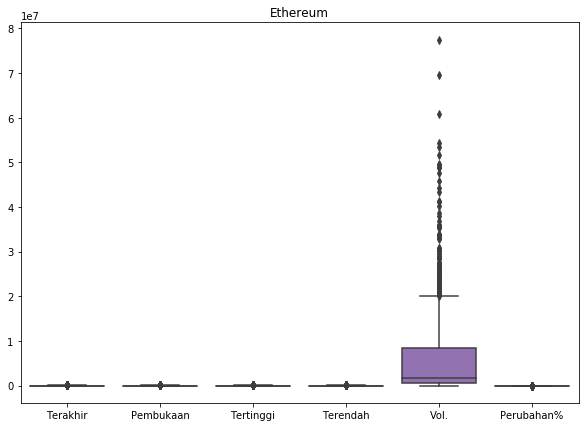

In [21]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("Ethereum")
plt.show()

Berdasarkan visualisasi boxplot diatas, dapat diketahui bahwa atribut Vol. memiliki data outlier yang banyak. Hal ini disebabkan karena pergerakan Crypto currency yang fluktuatif, sehingga pola data dalam atribut Vol. dapat membentuk Outlier

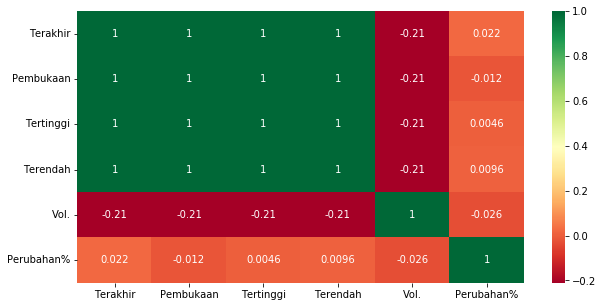

In [22]:
# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))

# plot heatmap
h = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

* Berdasarkan visualisasi dari heatmap korelasi dataset, diperoleh bahwa atribut Vol. merupakan atribut dengan korelasi paling lemah relasinya terhadap atribut Terakhir, Pembukaan, Tertinggi, dan Terendah dengan nilai korelasi = -0.21 kemudian diikuti oleh atribut Perubahan% dengan  nilai korelasi = -0.026.

* Atribut Perubahan% juga merupakan atribut dengan korelasi yang cukup lemah terhadap 5 atribut lainnya.

* Sedangkan atribut Terakhir, Pembukaan, Tertinggi, dan Terendah keempatnya memiliki korelasi yang kuat terhadap satu sama lainnya. Sehingga, dapat disimpulkan bahwa untuk membangun model prediksi nantinya atribut yang direkomendasikan adalah 

* --> Pembukaan
* --> Tertinggi
* --> Terendah
* --> Terakhir

In [23]:
#Melihat rata-rata harga
tahun = df['Tanggal']
harga_tinggi = df['Tertinggi']

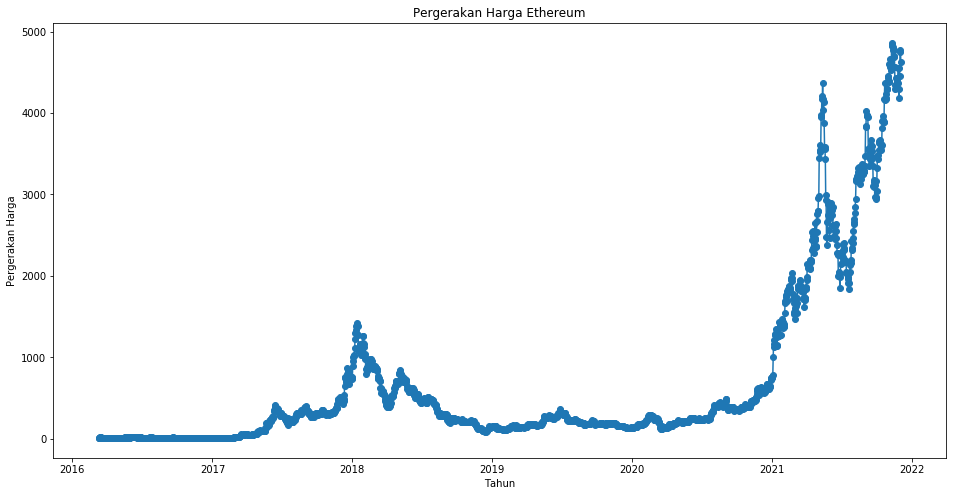

In [24]:
plt.figure(figsize=(16,8))
plt.scatter(tahun,harga_tinggi)
plt.plot(tahun,harga_tinggi)
plt.xlabel('Tahun')
plt.ylabel('Pergerakan Harga')
plt.title('Pergerakan Harga Ethereum')
plt.show()

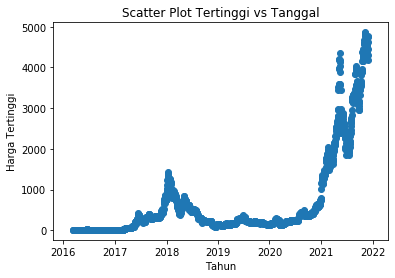

In [25]:
plt.scatter(df['Tanggal'], df['Tertinggi'])
plt.xlabel('Tahun')
plt.ylabel('Harga Tertinggi')
plt.title('Scatter Plot Tertinggi vs Tanggal')
plt.show()

In [26]:
# Prepare data
# Pertama, buat variabel x dan y.
x = df['Pembukaan'].values.reshape(-1,1)
y = df['Tertinggi'].values.reshape(-1,1)

## Formula Regresi Linear

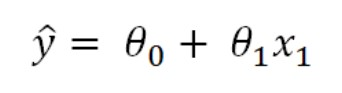

In [27]:
from IPython.display import Image
Image("Rumus Regresi Linear.jpg")

"Jika kita melihat formula regresi linear di atas, kita pasti ingat rumus persamaan garis yang pernah dipelajari di bangku sekolah, yaitu y = mx + c, dimana m merupakan gradien atau kemiringan garis dan c merupakan konstanta."

* from scratch
* y = ax + b atau y = w1x + w0 atau y = mx + c
* x = input
* y = output
* b atau w0 = intercept / bias
* a atau w1 = slope / gradient / coefficient

In [28]:
x_mean = np.mean(df['Pembukaan'])
y_mean = np.mean(df['Tertinggi'])
print('nilai mean var x: ', x_mean,'\n'
      'nilai mean var y: ', y_mean)

nilai mean var x:  637.7663662511954 
nilai mean var y:  662.3752492809195


## Formula Correlation Coefficient

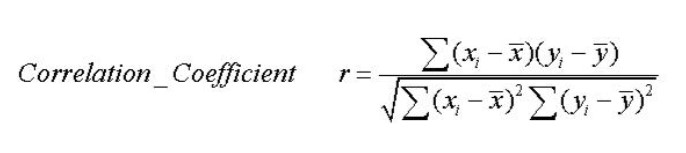

In [29]:
from IPython.display import Image
Image("Rumus CoefisienCorelation.jpg")

In [30]:
#Import library Math untuk dapat menggunakan fitur perhitungan
import math

In [31]:
atas = math.fsum((x - x_mean)*(y - y_mean))
bawah = math.sqrt((sum((x - x_mean)**2)) * (sum((y - y_mean)**2)))
correlation = atas/bawah
print('Nilai Correlation Coefficient: ', correlation)

Nilai Correlation Coefficient:  0.9992635206593434


## Mencari nilai theta 1 dan theta 0 dengan rumus dibawah ini

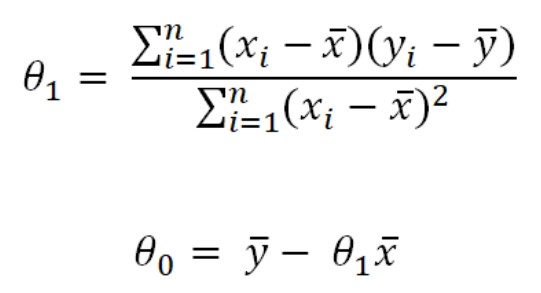

In [32]:
from IPython.display import Image
Image("Rumus Theta.jpg")

### Theta 1 atau nilai slope

In [33]:
# slope
# Slope adalah tingkat kemiringan garis, intercept 
# adalah jarak titik y pada garis dari titik 0
variance = math.fsum((x - x_mean)**2)
covariance = math.fsum((x - x_mean) * (y - y_mean))
theta_1 = covariance/variance
print('Nilai theta_1: ',theta_1)

Nilai theta_1:  1.0353418500550355


### Theta 0 atau nilai intercept

In [34]:
# intercept
theta_0 = y_mean - (theta_1 * x_mean)
print('Nilai theta_0: ',theta_0)

Nilai theta_0:  2.0690397435295154


### Maka persamaan garis : 

#     **y = 1.03x - 2.06**

Jadi persamaan garis diatas dapat digunakan untuk melakukan prediksi apabila kita memiliki data harga Pembukaan yang baru, harga Tertinggi dapat diperkirakan dengan rumus tersebut, masukkan nilai Pembukaan baru ke x, maka perkiraan nilai y (Teringgi) akan didapat.

# Data Modeling

In [35]:
# import Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

* X_train: Untuk menampung data source yang akan dilatih.
* X_test: Untuk menampung data target yang akan dilatih.
* y_train: Untuk menampung data source yang akan digunakan untuk testing.
* y_test: Untuk menampung data target yang akan digunakan untuk testing.

X dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target. Parameter *test_size* digunakan untuk mendefinisikan ukuran data testing. Dalam contoh di atas, test_size=0.2 berarti data yang digunakan sebagai data testing adalah sebesar 20% dari keseluruhan dataset.

Perlu diketahui bahwa metode ini akan membagi train set dan test set secara random atau acak. Jadi, jika kita mengulang proses running, maka tentunya hasil yang didapat akan berubah-ubah. Untuk mengatasinya, kita dapat menggunakan parameter *random_state*

##  Model Liner Regression Sederhana

In [37]:
#Import library LinearRegression
from sklearn.linear_model import LinearRegression

In [38]:
#Definisi variabel object LinerRegression
regressor = LinearRegression()

In [39]:
#Training the model menggunakan training data yang sudah displit sebelumnya.
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
#MElihat nilai koefisien (m) dan intercept (b)
print('Nilai Koefisien : ', regressor.coef_.item())
print('Nilai Intercept : ', regressor.intercept_.item())

Nilai Koefisien :  1.036341074413246
Nilai Intercept :  2.108953147465286


Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus persamaan menjadi:
#     **y = 1.03x + 1.79**

In [41]:
#Cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya. Dan nilai korelasinya
regressor.score(X_test,y_test)

0.9986633171237879

Model kita mendapatkan accuracy score sebesar 99.87%

In [42]:
print('Correlation: ', math.sqrt(regressor.score(X_test,y_test)))

Correlation:  0.9993314350723627


Text(0.5, 1.0, 'Plot Pembukaan vs Tertinggi')

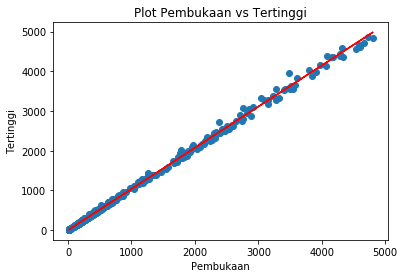

In [43]:
y_prediksi = regressor.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test, y_prediksi, c='r')
plt.xlabel('Pembukaan')
plt.ylabel('Tertinggi')
plt.title('Plot Pembukaan vs Tertinggi')

Garis merah merupakan Regression Line dari model yang telah dibuat sebelumnya.

In [44]:
np_table = np.concatenate((X_test,y_test,y_prediksi), axis=1)
new_dataframe = pd.DataFrame(data=np_table, columns=['X_test','y_test','y_predict'])

In [45]:
new_dataframe

,X_test,y_test,y_predict
0,697.06,713.80,724.500862
1,353.06,353.61,367.999533
2,11.69,11.76,14.223780
3,164.39,173.96,172.473062
4,448.73,465.09,467.146283
...,...,...,...
621,855.91,867.35,889.123642
622,2035.09,2042.61,2111.156310
623,257.00,299.89,268.448609
624,11.28,11.50,13.798880


In [46]:
#Prediksi harga mobil dengan enginesize 130.

print('nilai prediksi harga Tertinggi dengan harga Pembukaan dengan  : ','\n',regressor.predict([[4720.87]]).item())

nilai prediksi harga Tertinggi dengan harga Pembukaan dengan  :  
 4894.540441112726


In [47]:
from sklearn import metrics  
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediksi))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediksi))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediksi))) 

Mean Absolute Error: 18.73498146370773
Mean Squared Error: 1451.4662394578452
Root Mean Squared Error: 38.098113331999066


In [48]:
#Melihat skor prediksi dengan R^2
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_prediksi , y_test) )

R2-score: 1.00


In [49]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [50]:
regression_results(y_test, y_prediksi)

explained_variance:  0.9987
mean_squared_log_error:  0.0058
r2:  0.9987
MAE:  18.735
MSE:  1451.4662
RMSE:  38.0981


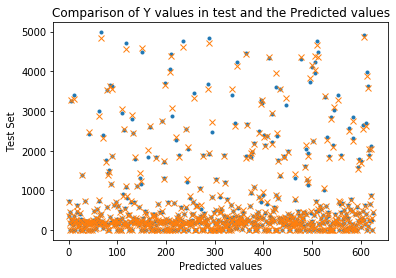

In [51]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(y_prediksi, '.', y_test, 'x')
plt.show()

## Model Regresi Linear Berganda

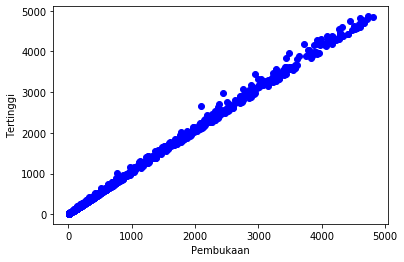

In [52]:
# visualisasi Pembukaan vs Tertinggi

plt.scatter(df['Pembukaan'], df['Tertinggi'],  color='blue')
plt.xlabel("Pembukaan")
plt.ylabel("Tertinggi")
plt.show()

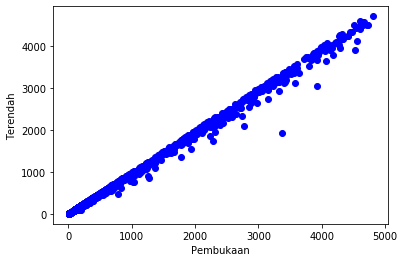

In [53]:
# visualisasi Pembukaan vs Terendah

plt.scatter(df['Pembukaan'], df['Terendah'],  color='blue')
plt.xlabel("Pembukaan")
plt.ylabel("Terendah")
plt.show()

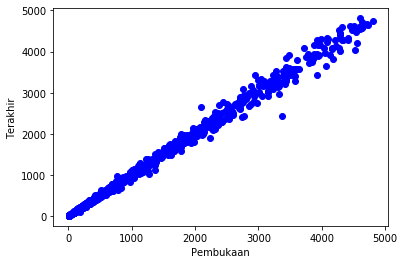

In [54]:
# visualisasi Pembukaan vs Terakhir

plt.scatter(df['Pembukaan'], df['Terakhir'],  color='blue')
plt.xlabel("Pembukaan")
plt.ylabel("Terakhir")
plt.show()

In [55]:
# seleksi data dan menampilkan 10 baris

cdf = df[['Tertinggi','Terendah','Terakhir','Pembukaan']]
cdf.head(10)

,Tertinggi,Terendah,Terakhir,Pembukaan
0,4629.75,4454.79,4569.60,4583.28
1,4778.14,4525.33,4583.28,4628.72
2,4749.12,4349.21,4628.90,4443.22
3,4456.82,4280.18,4443.22,4296.98
4,4297.63,3980.24,4296.98,4095.16
5,4183.02,4029.06,4094.80,4037.06
6,4548.10,3917.43,4034.53,4520.30
7,4549.74,4248.90,4520.30,4270.73
8,4372.83,4172.19,4273.54,4340.23
9,4384.75,4064.17,4340.23,4086.73


### Distribusi Data Training

In [56]:
## membuat dataset train dan test

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

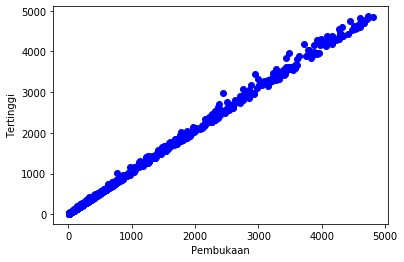

In [57]:
# visualisasi data train Tertinggi size vs Pembukaan

plt.scatter(train['Pembukaan'], train['Tertinggi'],  color='blue')
plt.xlabel("Pembukaan")
plt.ylabel("Tertinggi")
plt.show()

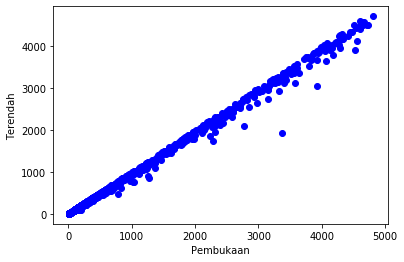

In [58]:
# visualisasi data train Terendah size vs Pembukaan

plt.scatter(train['Pembukaan'], train['Terendah'],  color='blue')
plt.xlabel("Pembukaan")
plt.ylabel("Terendah")
plt.show()

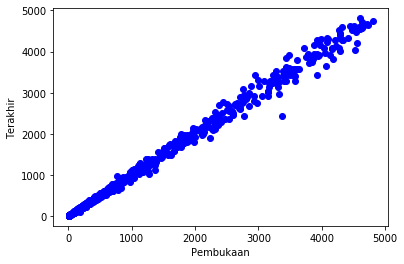

In [59]:
# visualisasi data train Terakhir size vs Pembukaan

plt.scatter(train['Pembukaan'], train['Terakhir'],  color='blue')
plt.xlabel("Pembukaan")
plt.ylabel("Terakhir")
plt.show()

In [60]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Tertinggi','Terendah','Terakhir']])
train_y = np.asanyarray(train[['Pembukaan']])
regr.fit (train_x, train_y)

LinearRegression()

In [61]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 1.08576804  0.63423402 -0.73270552]]
Intercept:  [-0.08922726]


Text(0, 0.5, 'Pembukaan')

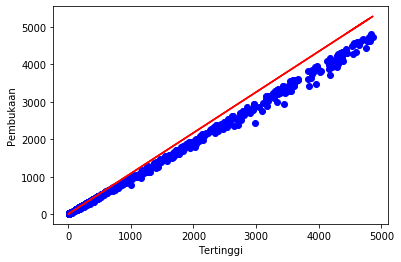

In [62]:
# visualisasi data train Engine size vs Emission dengan garis

plt.scatter(train.Tertinggi, train.Pembukaan,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Tertinggi")
plt.ylabel("Pembukaan")

#### Evaluasi
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi. Metrik evaluasi sangat penting untuk pengembangan model karena memberikan pengetahuan untuk perbaikan model.

Ada berbagai metrik untuk evaluasi model, misalnya MSE sebagai error untuk mengetahui akurasi dari model yang dibangun yang dihitung dari MSE model terhadap data pengujian: 

- Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
- Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
- Root Mean Squared Error (RMSE).
- R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.


In [63]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Tertinggi','Terendah','Terakhir']])
test_y = np.asanyarray(test[['Pembukaan']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.4f" % r2_score(test_y_ , test_y))

Mean absolute error: 11.64
Residual sum of squares (MSE): 672.02
R2-score: 0.9991


====================================================

### Model Support Vector Regression

In [64]:
# Mengambil "Tertinggi" sebagai variabel independen (regressor)
X1 = cdf.iloc[:, 0].values
# Mengambil "Pembukaan" sebagai variabel dependen
y1 = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "Engine Size"
X1 = X1.reshape(-1,1)
# Reshape data karena hanya satu fitur
y1 = y1.reshape(-1,1)

In [65]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X1 = sc_X.fit_transform(X1)
y1 = sc_y.fit_transform(y1)

In [67]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor1 = SVR(kernel = 'linear')
#linear = Linear Kernel
regressor1.fit(X1, y1)

SVR(kernel='linear')

In [69]:
# Predicting a new result

y_pred = regressor.predict(sc_X.transform(np.array([[5.4]])))
#To transform 5.4 to the scaled X value, we first need to convert it into the array form
#Since the transform method of StandardScaler Library only accepts arrays

y_pred = sc_y.inverse_transform(y_pred)
#Now the prediction gives us the scaled value of y
#Thus we need inverse transformation of the scaled value for the real results

print(y_pred.item())

2077.9596267127213


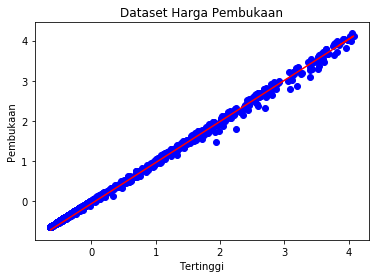

In [70]:
# Visualising the SVR results
plt.scatter(X1, y1, color = 'blue')
plt.plot(X1, regressor1.predict(X1), color = 'red')
plt.title('Dataset Harga Pembukaan')
plt.xlabel('Tertinggi')
plt.ylabel('Pembukaan')
plt.show()

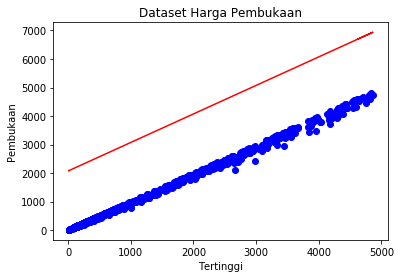

In [71]:
# Visualising the SVR results
plt.scatter(sc_X.inverse_transform(X1), sc_y.inverse_transform(y1), color = 'blue')
plt.plot(sc_X.inverse_transform(X1), sc_y.inverse_transform(regressor.predict(X1)), color = 'red')
plt.title('Dataset Harga Pembukaan')
plt.xlabel('Tertinggi')
plt.ylabel('Pembukaan')
plt.show()

In [72]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(cdf[['Tertinggi']])
test_y = np.asanyarray(cdf[['Pembukaan']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 2097.32
Residual sum of squares (MSE): 4401559.68
R2-score: -3.14


## Build Model - RNN

In [ ]:
# Import library untuk membangun model RNN
from keras.layers import Dense, Dropout,SimpleRNN
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [ ]:
hargaTinggi = df['Tertinggi'].values.reshape(-1,1)
hargaTinggi

In [ ]:
Tahun = df['Tanggal'].values.reshape(-1,1)
Tahun

In [ ]:
# Visualisasi data harga Teringgi
plt.figure(figsize=(14,10))                 
plt.plot(Tahun,hargaTinggi, c="red")
plt.title("Pergerakan Harga Tertinggi Ethereum",fontsize=16)
plt.xlabel("Tahun",fontsize=16)
plt.ylabel("Harga Tertinggi",fontsize=16)
plt.grid()
plt.show()

In [ ]:
# Menskalakan data antara 1 dan 0 (scaling) pada low data
scaler = MinMaxScaler(feature_range=(0,1))           
tertinggi_scaled = scaler.fit_transform(hargaTinggi)

In [ ]:
# definisikan variabel step dan train 

step_size = 85                     

train_x = []
train_y = []

In [ ]:
# membuat fitur dan lists label

for i in range(step_size, 2085):                
    train_x.append(tertinggi_scaled[i-step_size:i,0])
    train_y.append(tertinggi_scaled[i,0])

In [ ]:
# mengonversi list yang telah dibuat sebelumnya ke array

train_x = np.array(train_x)                   
train_y = np.array(train_y)

In [ ]:
# cek dimensi data dengan function .shape

print(train_x.shape)                               

In [ ]:
# 498 hari terakhir akan digunakan dalam pengujian
# 2500 hari pertama akan digunakan dalam pelatihan

test_x  = train_x[1600:]            
train_x = train_x[:1600]          
test_y = train_y[1600:]  
train_y = train_y[:1600]

In [ ]:
# reshape data untuk dimasukkan kedalam Keras model

train_x = np.reshape(train_x, (1600, step_size, 1))           
test_x = np.reshape(test_x, (400, step_size, 1))

In [ ]:
# buat varibel penampung model RNN
rnn_model = Sequential()

In [ ]:
# Output dari SimpleRNN akan menjadi bentuk tensor 2D (batch_size, 40) dengan Dropout sebesar 0.15

rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True, input_shape=(train_x.shape[1], 1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=False))
rnn_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
rnn_model.add(Dense(1))

In [ ]:
# menambahkan loss function kedalam model RNN dengan tipe MSE

rnn_model.compile(optimizer="adam", loss="MSE")

In [ ]:
# fit the model RNN, dengan epoch 20 dan batch size 25

#rnn_model.fit(X_train, y_train, epochs=20, batch_size=25)

In [ ]:
# Prediksi Model RNN
rnn_predictions = rnn_model.predict(test_x)

rnn_score = r2_score(test_y, rnn_predictions)

In [ ]:
rnn_score

## Build Model - LSTM

In [ ]:
# import library for build model 
from keras.layers import LSTM

In [ ]:
# buat varibel penampung model LSTM
lstm_model = Sequential()

In [ ]:
# Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.15

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
lstm_model.add(Dense(1))

In [ ]:
# menambahkan loss function kedalam model lstm dengan tipe MSE

lstm_model.compile(optimizer="adam",loss="MSE")

In [ ]:
# fit lstm model, dengan epoch 20 dan batch size 25

lstm_model.fit(train_x,train_y,epochs=20,batch_size=25)

In [ ]:
# Prediksi Model LSTM
lstm_predictions = lstm_model.predict(test_x)

In [ ]:
lstm_predictions

In [ ]:
lstm_score = r2_score(test_y,lstm_predictions)
lstm_score

In [ ]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
#plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()